In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
os.chdir('C:\\code\\activ')

In [3]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

tf.config.run_functions_eagerly(True)

In [4]:
def shift_data(origin, d):
    shift_d = np.concatenate((origin[0][1::], d), axis=0).reshape(1, 12, 1)
    return shift_d

In [5]:
df = pd.read_excel('./documents/nov_nine_var.xlsx').iloc[:,1::].to_numpy()

scaler = MinMaxScaler()
scale_df = scaler.fit_transform(df)

data = scale_df[:,0:21][-1-12:-1].reshape(1, 12, 21)

In [6]:
def make_dataset(d, length=12, test_size=0.2):
    X_data, y_data = [], []

    for i in range(0, len(d)-length-1):
        X_data.append(d[i:i+length])
        y_data.append(d[i+length+1])

    X_data = np.array(X_data)
    y_data = np.array(y_data)
    
    da = train_test_split(X_data, y_data, test_size=test_size, shuffle=False)
    da[0] = da[0].reshape(len(da[0]), 12, 1)
    da[1] = da[1].reshape(len(da[1]), 12, 1)
    da[2] = da[2].reshape(len(da[2]), 1)
    da[3] = da[3].reshape(len(da[3]), 1)
    
    return da

In [25]:
class Model_(tf.keras.Model):
    def __init__(self):
        super(Model_, self).__init__()
        self.d0 = tf.keras.layers.LSTM(16, activation='tanh', return_sequences=False, dropout=0.2)
        self.d2 = tf.keras.layers.Dense(8, activation='relu')
        self.d3 = tf.keras.layers.Dense(units=1, activation='linear')

    def call(self, inputs):
        x = self.d0(inputs)
        x = self.d2(x)
        x = self.d3(x)

        return x

In [26]:
model_list = [[Model_() for i in range(21)] for j in range(5)] # model_list.shape = 5, 21, model
for j in range(5):
    for i in range(21):
        d = make_dataset(scale_df[:,i])
        model = model_list[j][i]
        model.build(input_shape=(1, 12, 1))
        model.compile(optimizer='adam', loss='mse')

        model.fit(d[0], d[2], epochs=1000, batch_size=128, validation_data=(d[1], d[3]), verbose=0)
        model.save('./model/one_lstm/one_lstm_{0}/{1}_model'.format(j, i))

Epoch 1/1000
3/3 [==============================] - 0s 95ms/step - loss: 0.3722 - val_loss: 0.0466
Epoch 2/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.3133 - val_loss: 0.0314
Epoch 3/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.2440 - val_loss: 0.0195
Epoch 4/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.1755 - val_loss: 0.0121
Epoch 5/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.1186 - val_loss: 0.0105
Epoch 6/1000
3/3 [==============================] - 0s 61ms/step - loss: 0.0726 - val_loss: 0.0155
Epoch 7/1000
3/3 [==============================] - 0s 61ms/step - loss: 0.0421 - val_loss: 0.0271
Epoch 8/1000
3/3 [==============================] - 0s 61ms/step - loss: 0.0237 - val_loss: 0.0436
Epoch 9/1000
3/3 [==============================] - 0s 61ms/step - loss: 0.0210 - val_loss: 0.0602
Epoch 10/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0254 - val_loss: 0.0708
Epoch 11/

INFO:tensorflow:Assets written to: ./model/one_lstm0\assets


INFO:tensorflow:Assets written to: ./model/one_lstm0\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.3642

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 83ms/step - loss: 0.3642 - val_loss: 0.9372
Epoch 2/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.3505 - val_loss: 0.9068
Epoch 3/1000
3/3 [==============================] - 0s 61ms/step - loss: 0.3367 - val_loss: 0.8748
Epoch 4/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.3224 - val_loss: 0.8414
Epoch 5/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.3072 - val_loss: 0.8065
Epoch 6/1000
3/3 [==============================] - 0s 72ms/step - loss: 0.2926 - val_loss: 0.7702
Epoch 7/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.2760 - val_loss: 0.7325
Epoch 8/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.2605 - val_loss: 0.6933
Epoch 9/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.2431 - val_loss: 0.6527
Epoch 10/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.2246 - val_loss: 0.6123
Epoch 11/1000
3/3 [===

INFO:tensorflow:Assets written to: ./model/one_lstm1\assets


INFO:tensorflow:Assets written to: ./model/one_lstm1\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.3122

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 83ms/step - loss: 0.3122 - val_loss: 0.0381
Epoch 2/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.2768 - val_loss: 0.0304
Epoch 3/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.2436 - val_loss: 0.0237
Epoch 4/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.2103 - val_loss: 0.0181
Epoch 5/1000
3/3 [==============================] - 0s 83ms/step - loss: 0.1810 - val_loss: 0.0134
Epoch 6/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1502 - val_loss: 0.0095
Epoch 7/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.1258 - val_loss: 0.0068
Epoch 8/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.0955 - val_loss: 0.0059
Epoch 9/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0723 - val_loss: 0.0075
Epoch 10/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0428 - val_loss: 0.0127
Epoch 11/1000
3/3 [===

INFO:tensorflow:Assets written to: ./model/one_lstm2\assets


INFO:tensorflow:Assets written to: ./model/one_lstm2\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.1462

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 82ms/step - loss: 0.1462 - val_loss: 0.3626
Epoch 2/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.1046 - val_loss: 0.2680
Epoch 3/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.0715 - val_loss: 0.1847
Epoch 4/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.0422 - val_loss: 0.1148
Epoch 5/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.0212 - val_loss: 0.0618
Epoch 6/1000
3/3 [==============================] - 0s 62ms/step - loss: 0.0123 - val_loss: 0.0272
Epoch 7/1000
3/3 [==============================] - 0s 62ms/step - loss: 0.0105 - val_loss: 0.0097
Epoch 8/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.0138 - val_loss: 0.0036
Epoch 9/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0139 - val_loss: 0.0027
Epoch 10/1000
3/3 [==============================] - 0s 62ms/step - loss: 0.0133 - val_loss: 0.0043
Epoch 11/1000
3/3 [===

INFO:tensorflow:Assets written to: ./model/one_lstm3\assets


INFO:tensorflow:Assets written to: ./model/one_lstm3\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.6562

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 83ms/step - loss: 0.6562 - val_loss: 1.2798
Epoch 2/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.5962 - val_loss: 1.1819
Epoch 3/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.5585 - val_loss: 1.1391
Epoch 4/1000
3/3 [==============================] - 0s 62ms/step - loss: 0.5360 - val_loss: 1.0948
Epoch 5/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.5097 - val_loss: 1.0515
Epoch 6/1000
3/3 [==============================] - 0s 62ms/step - loss: 0.4889 - val_loss: 1.0094
Epoch 7/1000
3/3 [==============================] - 0s 62ms/step - loss: 0.4670 - val_loss: 0.9688
Epoch 8/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.4478 - val_loss: 0.9336
Epoch 9/1000
3/3 [==============================] - 0s 62ms/step - loss: 0.4385 - val_loss: 0.9281
Epoch 10/1000
3/3 [==============================] - 0s 61ms/step - loss: 0.4348 - val_loss: 0.9226
Epoch 11/1000
3/3 [===

INFO:tensorflow:Assets written to: ./model/one_lstm4\assets


INFO:tensorflow:Assets written to: ./model/one_lstm4\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.3768

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 83ms/step - loss: 0.3768 - val_loss: 0.8322
Epoch 2/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.3525 - val_loss: 0.7825
Epoch 3/1000
3/3 [==============================] - 0s 81ms/step - loss: 0.3283 - val_loss: 0.7315
Epoch 4/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.3015 - val_loss: 0.6791
Epoch 5/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.2730 - val_loss: 0.6184
Epoch 6/1000
3/3 [==============================] - 0s 75ms/step - loss: 0.2385 - val_loss: 0.5317
Epoch 7/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.1887 - val_loss: 0.4104
Epoch 8/1000
3/3 [==============================] - 0s 61ms/step - loss: 0.1321 - val_loss: 0.2837
Epoch 9/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0794 - val_loss: 0.1697
Epoch 10/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.0426 - val_loss: 0.0833
Epoch 11/1000
3/3 [===

INFO:tensorflow:Assets written to: ./model/one_lstm5\assets


INFO:tensorflow:Assets written to: ./model/one_lstm5\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.2405

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 87ms/step - loss: 0.2405 - val_loss: 0.0264
Epoch 2/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.2279 - val_loss: 0.0241
Epoch 3/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.2180 - val_loss: 0.0219
Epoch 4/1000
3/3 [==============================] - 0s 79ms/step - loss: 0.2074 - val_loss: 0.0197
Epoch 5/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.1963 - val_loss: 0.0176
Epoch 6/1000
3/3 [==============================] - 0s 62ms/step - loss: 0.1855 - val_loss: 0.0156
Epoch 7/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1735 - val_loss: 0.0136
Epoch 8/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.1627 - val_loss: 0.0118
Epoch 9/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.1506 - val_loss: 0.0101
Epoch 10/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.1389 - val_loss: 0.0085
Epoch 11/1000
3/3 [===

INFO:tensorflow:Assets written to: ./model/one_lstm6\assets


INFO:tensorflow:Assets written to: ./model/one_lstm6\assets


Epoch 1/1000
2/3 [===================>..........] - ETA: 0s - loss: 0.0502

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 91ms/step - loss: 0.0485 - val_loss: 0.1896
Epoch 2/1000
3/3 [==============================] - 0s 103ms/step - loss: 0.0392 - val_loss: 0.1647
Epoch 3/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.0318 - val_loss: 0.1420
Epoch 4/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0254 - val_loss: 0.1207
Epoch 5/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0198 - val_loss: 0.1008
Epoch 6/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.0155 - val_loss: 0.0825
Epoch 7/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0115 - val_loss: 0.0664
Epoch 8/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.0092 - val_loss: 0.0527
Epoch 9/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.0080 - val_loss: 0.0420
Epoch 10/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0075 - val_loss: 0.0346
Epoch 11/1000
3/3 [==

INFO:tensorflow:Assets written to: ./model/one_lstm7\assets


INFO:tensorflow:Assets written to: ./model/one_lstm7\assets


Epoch 1/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.2285

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 121ms/step - loss: 0.2041 - val_loss: 0.0429
Epoch 2/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1915 - val_loss: 0.0388
Epoch 3/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.1808 - val_loss: 0.0342
Epoch 4/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.1676 - val_loss: 0.0294
Epoch 5/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1521 - val_loss: 0.0246
Epoch 6/1000
3/3 [==============================] - 0s 70ms/step - loss: 0.1352 - val_loss: 0.0202
Epoch 7/1000
3/3 [==============================] - 0s 71ms/step - loss: 0.1195 - val_loss: 0.0163
Epoch 8/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1040 - val_loss: 0.0131
Epoch 9/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0867 - val_loss: 0.0107
Epoch 10/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0743 - val_loss: 0.0096
Epoch 11/1000
3/3 [==

INFO:tensorflow:Assets written to: ./model/one_lstm8\assets


INFO:tensorflow:Assets written to: ./model/one_lstm8\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.1164

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 84ms/step - loss: 0.1164 - val_loss: 0.0864
Epoch 2/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0884 - val_loss: 0.0563
Epoch 3/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0580 - val_loss: 0.0321
Epoch 4/1000
3/3 [==============================] - 0s 80ms/step - loss: 0.0353 - val_loss: 0.0147
Epoch 5/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0219 - val_loss: 0.0050
Epoch 6/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0143 - val_loss: 0.0026
Epoch 7/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0110 - val_loss: 0.0054
Epoch 8/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0145 - val_loss: 0.0093
Epoch 9/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.0153 - val_loss: 0.0107
Epoch 10/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.0144 - val_loss: 0.0090
Epoch 11/1000
3/3 [===

INFO:tensorflow:Assets written to: ./model/one_lstm9\assets


INFO:tensorflow:Assets written to: ./model/one_lstm9\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.1268

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 85ms/step - loss: 0.1268 - val_loss: 0.0122
Epoch 2/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0988 - val_loss: 0.0086
Epoch 3/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.0808 - val_loss: 0.0060
Epoch 4/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.0624 - val_loss: 0.0046
Epoch 5/1000
3/3 [==============================] - 0s 87ms/step - loss: 0.0454 - val_loss: 0.0047
Epoch 6/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0328 - val_loss: 0.0067
Epoch 7/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0262 - val_loss: 0.0105
Epoch 8/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0215 - val_loss: 0.0155
Epoch 9/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0216 - val_loss: 0.0195
Epoch 10/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0248 - val_loss: 0.0209
Epoch 11/1000
3/3 [===

INFO:tensorflow:Assets written to: ./model/one_lstm10\assets


INFO:tensorflow:Assets written to: ./model/one_lstm10\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.2188

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 85ms/step - loss: 0.2188 - val_loss: 0.1276
Epoch 2/1000
3/3 [==============================] - 0s 71ms/step - loss: 0.1935 - val_loss: 0.1236
Epoch 3/1000
3/3 [==============================] - 0s 86ms/step - loss: 0.1856 - val_loss: 0.1199
Epoch 4/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.1803 - val_loss: 0.1158
Epoch 5/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1743 - val_loss: 0.1100
Epoch 6/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.1665 - val_loss: 0.1018
Epoch 7/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.1556 - val_loss: 0.0912
Epoch 8/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1408 - val_loss: 0.0787
Epoch 9/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.1206 - val_loss: 0.0652
Epoch 10/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.1004 - val_loss: 0.0522
Epoch 11/1000
3/3 [===

INFO:tensorflow:Assets written to: ./model/one_lstm11\assets


INFO:tensorflow:Assets written to: ./model/one_lstm11\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.1127

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 85ms/step - loss: 0.1127 - val_loss: 0.0208
Epoch 2/1000
3/3 [==============================] - 0s 70ms/step - loss: 0.0987 - val_loss: 0.0157
Epoch 3/1000
3/3 [==============================] - 0s 87ms/step - loss: 0.0840 - val_loss: 0.0111
Epoch 4/1000
3/3 [==============================] - 0s 72ms/step - loss: 0.0713 - val_loss: 0.0071
Epoch 5/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0580 - val_loss: 0.0037
Epoch 6/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.0455 - val_loss: 0.0020
Epoch 7/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.0351 - val_loss: 0.0027
Epoch 8/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0262 - val_loss: 0.0060
Epoch 9/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.0211 - val_loss: 0.0117
Epoch 10/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0187 - val_loss: 0.0184
Epoch 11/1000
3/3 [===

INFO:tensorflow:Assets written to: ./model/one_lstm12\assets


INFO:tensorflow:Assets written to: ./model/one_lstm12\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.2154

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 86ms/step - loss: 0.2154 - val_loss: 0.0647
Epoch 2/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.1893 - val_loss: 0.0530
Epoch 3/1000
3/3 [==============================] - 0s 90ms/step - loss: 0.1648 - val_loss: 0.0411
Epoch 4/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.1403 - val_loss: 0.0281
Epoch 5/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1146 - val_loss: 0.0173
Epoch 6/1000
3/3 [==============================] - 0s 83ms/step - loss: 0.0879 - val_loss: 0.0093
Epoch 7/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0651 - val_loss: 0.0038
Epoch 8/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0453 - val_loss: 7.4210e-04
Epoch 9/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0326 - val_loss: 5.2392e-04
Epoch 10/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0204 - val_loss: 0.0032
Epoch 11/1000


INFO:tensorflow:Assets written to: ./model/one_lstm13\assets


INFO:tensorflow:Assets written to: ./model/one_lstm13\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.1983

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 83ms/step - loss: 0.1983 - val_loss: 0.0134
Epoch 2/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1730 - val_loss: 0.0095
Epoch 3/1000
3/3 [==============================] - 0s 83ms/step - loss: 0.1483 - val_loss: 0.0059
Epoch 4/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.1271 - val_loss: 0.0032
Epoch 5/1000
3/3 [==============================] - 0s 79ms/step - loss: 0.1057 - val_loss: 0.0021
Epoch 6/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0820 - val_loss: 0.0027
Epoch 7/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0633 - val_loss: 0.0056
Epoch 8/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.0479 - val_loss: 0.0109
Epoch 9/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0375 - val_loss: 0.0180
Epoch 10/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0332 - val_loss: 0.0254
Epoch 11/1000
3/3 [===

INFO:tensorflow:Assets written to: ./model/one_lstm14\assets


INFO:tensorflow:Assets written to: ./model/one_lstm14\assets


Epoch 1/1000
2/3 [===================>..........] - ETA: 0s - loss: 0.1620

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 88ms/step - loss: 0.1758 - val_loss: 0.0182
Epoch 2/1000
3/3 [==============================] - 0s 86ms/step - loss: 0.1564 - val_loss: 0.0146
Epoch 3/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.1378 - val_loss: 0.0123
Epoch 4/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1245 - val_loss: 0.0101
Epoch 5/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.1155 - val_loss: 0.0079
Epoch 6/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1044 - val_loss: 0.0060
Epoch 7/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.0964 - val_loss: 0.0043
Epoch 8/1000
3/3 [==============================] - 0s 91ms/step - loss: 0.0855 - val_loss: 0.0030
Epoch 9/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0755 - val_loss: 0.0020
Epoch 10/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0662 - val_loss: 0.0016
Epoch 11/1000
3/3 [===

INFO:tensorflow:Assets written to: ./model/one_lstm15\assets


INFO:tensorflow:Assets written to: ./model/one_lstm15\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.2403

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 87ms/step - loss: 0.2403 - val_loss: 0.6614
Epoch 2/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.1963 - val_loss: 0.5476
Epoch 3/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.1555 - val_loss: 0.4433
Epoch 4/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.1193 - val_loss: 0.3520
Epoch 5/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0906 - val_loss: 0.2710
Epoch 6/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0636 - val_loss: 0.2004
Epoch 7/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.0455 - val_loss: 0.1406
Epoch 8/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0315 - val_loss: 0.0931
Epoch 9/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0215 - val_loss: 0.0573
Epoch 10/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0158 - val_loss: 0.0331
Epoch 11/1000
3/3 [===

INFO:tensorflow:Assets written to: ./model/one_lstm16\assets


INFO:tensorflow:Assets written to: ./model/one_lstm16\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.6450

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 91ms/step - loss: 0.6450 - val_loss: 0.0049
Epoch 2/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.5754 - val_loss: 0.0039
Epoch 3/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.5254 - val_loss: 0.0034
Epoch 4/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.4778 - val_loss: 0.0028
Epoch 5/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.4358 - val_loss: 0.0021
Epoch 6/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.4038 - val_loss: 0.0017
Epoch 7/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.3753 - val_loss: 0.0014
Epoch 8/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.3560 - val_loss: 0.0012
Epoch 9/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.3369 - val_loss: 9.7221e-04
Epoch 10/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.3261 - val_loss: 8.2952e-04
Epoch 11/1000


INFO:tensorflow:Assets written to: ./model/one_lstm17\assets


INFO:tensorflow:Assets written to: ./model/one_lstm17\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.1789

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 82ms/step - loss: 0.1789 - val_loss: 0.2311
Epoch 2/1000
3/3 [==============================] - 0s 71ms/step - loss: 0.1488 - val_loss: 0.1922
Epoch 3/1000
3/3 [==============================] - 0s 92ms/step - loss: 0.1235 - val_loss: 0.1578
Epoch 4/1000
3/3 [==============================] - 0s 71ms/step - loss: 0.1016 - val_loss: 0.1256
Epoch 5/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.0820 - val_loss: 0.0963
Epoch 6/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.0632 - val_loss: 0.0716
Epoch 7/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0491 - val_loss: 0.0498
Epoch 8/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0377 - val_loss: 0.0330
Epoch 9/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0274 - val_loss: 0.0224
Epoch 10/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0215 - val_loss: 0.0137
Epoch 11/1000
3/3 [===

INFO:tensorflow:Assets written to: ./model/one_lstm18\assets


INFO:tensorflow:Assets written to: ./model/one_lstm18\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.1711

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 85ms/step - loss: 0.1711 - val_loss: 0.1455
Epoch 2/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.1524 - val_loss: 0.1262
Epoch 3/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.1352 - val_loss: 0.1118
Epoch 4/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1236 - val_loss: 0.1028
Epoch 5/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1148 - val_loss: 0.0931
Epoch 6/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.1070 - val_loss: 0.0837
Epoch 7/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.0979 - val_loss: 0.0747
Epoch 8/1000
3/3 [==============================] - 0s 72ms/step - loss: 0.0904 - val_loss: 0.0664
Epoch 9/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.0824 - val_loss: 0.0585
Epoch 10/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0751 - val_loss: 0.0510
Epoch 11/1000
3/3 [===

INFO:tensorflow:Assets written to: ./model/one_lstm19\assets


INFO:tensorflow:Assets written to: ./model/one_lstm19\assets


Epoch 1/1000
3/3 [==============================] - ETA: 0s - loss: 0.2837

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 82ms/step - loss: 0.2837 - val_loss: 1.2709
Epoch 2/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.2366 - val_loss: 1.1069
Epoch 3/1000
3/3 [==============================] - 0s 77ms/step - loss: 0.2027 - val_loss: 0.9668
Epoch 4/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1779 - val_loss: 0.8784
Epoch 5/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.1610 - val_loss: 0.8057
Epoch 6/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.1500 - val_loss: 0.7759
Epoch 7/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1425 - val_loss: 0.7446
Epoch 8/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.1348 - val_loss: 0.7123
Epoch 9/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.1269 - val_loss: 0.6797
Epoch 10/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.1191 - val_loss: 0.6463
Epoch 11/1000
3/3 [===

INFO:tensorflow:Assets written to: ./model/one_lstm20\assets


INFO:tensorflow:Assets written to: ./model/one_lstm20\assets


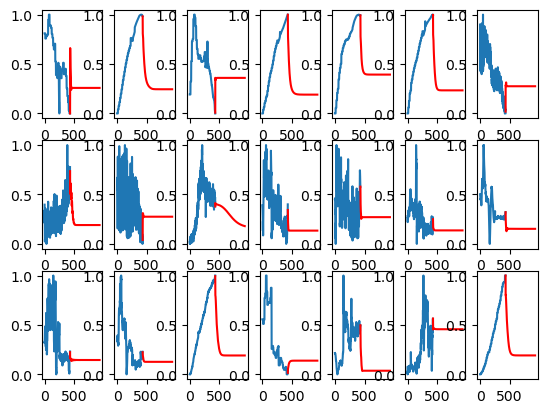

In [31]:
real_axis = [i for i in range(scale_df.shape[0])]
pred_axis = [i + scale_df.shape[0] for i in range(500)]

for i in range(21):
    plt.subplot(3, 7, i+1)
    plt.plot(real_axis, scale_df[:, i])

    a = np.zeros((500, 1))
    pred = scale_df[:, i][-13:-1].reshape(1, 12, 1)
    for j in range(500):
        a[j] = pred[0][-1]
        pred = shift_data(pred, model_list[i](pred))
    
    plt.plot(pred_axis, a[:,0], c='r')

plt.show()

In [33]:
a = 0
for i in range(21):
    da = make_dataset(scale_df[:,-1])
    a += model_list[i].evaluate(da[1], da[3])
print(a)

3/3 [==============================] - 0s 35ms/step - loss: 0.0434


c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 26ms/step - loss: 0.0321
1.3165116477757692


In [34]:
a/21

0.0626910308464652